In [12]:
!pip install geocoder
!pip install folium

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 98 kB 5.6 MB/s eta 0:00:011
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |██████████████████████████

In [22]:
#Load necessary libraries
import requests
from bs4 import BeautifulSoup
from urllib.request import urlopen
import geocoder
from geopy.geocoders import Nominatim
import folium

import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

In [25]:
url = 'https://en.wikipedia.org/wiki/List_of_municipalities_in_Newfoundland_and_Labrador'
newfoundland_data = requests.get(url).text
soup = BeautifulSoup(newfoundland_data, 'lxml')

In [26]:
table=soup.findAll('table')

nftown_data = pd.DataFrame(columns=['Town/City','Area'])

for tables in table[:1]:
    for row in tables.find_all('tr'):
        col = row.find_all('td')
        if (col != []):
            town = col[0].text.strip()
            population = col[2].text.strip().replace(",", "")
            area = col[5].text.strip()

            nftown_data = nftown_data.append({'Town/City':town, 'Area':area}, ignore_index=True)
            
nftown_data

Town/City      Area
0                                    Corner Brook    148.26
1                                     Mount Pearl     15.76
2                                      St. John's    445.88
3                                  Admirals Beach     24.42
4                                    Anchor Point      2.41
5                                        Appleton      6.39
6                                       Aquaforte      6.82
7                                   Arnold's Cove      4.79
8                                        Avondale     29.98
9                                          Badger      1.96
10                                     Baie Verte    371.09
11                                  Baine Harbour      4.82
12                                        Bauline     15.94
13                                      Bay Bulls     30.74
14                                   Bay de Verde     13.28
15                                   Bay L'Argent      3.68
16                                    Bay Roberts     24.05
17                                        Baytona     15.38
18                                      Beachside      2.61
19                                      Bellburns      7.39
20                                      Belleoram      2.11
21                                     Birchy Bay     49.52
22                                      Bird Cove      9.39
23                                  Bishop's Cove      1.89
24                                 Bishop's Falls     28.12
25                                      Bonavista      31.5
26                                        Botwood     15.05
27                                         Branch     16.15
28                                   Brent's Cove      1.02
29                                       Brighton      2.23
30                                         Brigus     11.57
31                                  Bryant's Cove      4.88
32                                        Buchans      4.88
33                                         Burgeo     31.34
34                                          Burin     34.14
35                                     Burlington       4.1
36                                  Burnt Islands      9.52
37                                    Campbellton     35.71
38                                    Cape Broyle     10.05
39                                Cape St. George     33.46
40                                      Carbonear     11.81
41                                    Carmanville     43.08
42                                     Cartwright      3.27
43                    Centreville-Wareham-Trinity     37.25
44                                    Chance Cove      18.2
45                                 Change Islands      5.31
46                       Channel-Port aux Basques     38.77
47                                     Chapel Arm     28.11
48                                  Charlottetown     30.53
49                                    Clarenville    140.81
50                                 Clarke's Beach     12.71
51                                Coachman's Cove     18.15
52                                        Colinet      6.24
53                                       Colliers     26.23
54                                 Come By Chance     39.72
55                          Comfort Cove-Newstead     29.83
56                           Conception Bay South      59.1
57                             Conception Harbour     21.61
58                                         Conche      9.25
59                                 Cook's Harbour      1.95
60                                        Cormack    133.88
61                                   Cottlesville     11.17
62                                       Cow Head     17.84
63                                     Cox's Cove      7.21
64                                      Crow Head      2.98
65                                         Cupids     11.02
66                  

In [27]:
nftown_data['Latitude']=""
nftown_data['Longitude']=""

# loop until you get the coordinates
for index,row in nftown_data.iterrows():
    lat_lng_coords = None
    while(lat_lng_coords is None):
        g = geocoder.arcgis('Newfoundland, {} '.format(row['Town/City']))
        lat_lng_coords = g.latlng

    row['Latitude']=lat_lng_coords[0]
    row['Longitude']= lat_lng_coords[1]

nftown_data

Town/City      Area Latitude Longitude
0                                    Corner Brook    148.26   48.951  -57.9501
1                                     Mount Pearl     15.76  47.5189  -52.8063
2                                      St. John's    445.88  47.5608  -52.7122
3                                  Admirals Beach     24.42  47.0172  -53.6267
4                                    Anchor Point      2.41  51.2334  -56.7981
5                                        Appleton      6.39  48.9949   -54.862
6                                       Aquaforte      6.82  46.9999  -52.9648
7                                   Arnold's Cove      4.79  47.7726  -53.9785
8                                        Avondale     29.98  47.4234  -53.1966
9                                          Badger      1.96  48.9833  -56.0315
10                                     Baie Verte    371.09  49.9398  -56.1914
11                                  Baine Harbour      4.82  47.3676  -54.9079
12                                        Bauline     15.94  47.7168  -52.8239
13                                      Bay Bulls     30.74   47.317  -52.8186
14                                   Bay de Verde     13.28  48.0893  -52.8974
15                                   Bay L'Argent      3.68  47.5499  -54.8982
16                                    Bay Roberts     24.05   47.584  -53.2815
17                                        Baytona     15.38  49.3058  -54.7774
18                                      Beachside      2.61  49.6333  -55.8982
19                                      Bellburns      7.39  50.3349  -57.5334
20                                      Belleoram      2.11  47.5166   -55.415
21                                     Birchy Bay     49.52  49.3543  -54.7131
22                                      Bird Cove      9.39  51.0562   -56.921
23                                  Bishop's Cove      1.89  47.6332  -53.2314
24                                 Bishop's Falls     28.12  49.0269  -55.4567
25                                      Bonavista      31.5  48.6561  -53.0991
26                                        Botwood     15.05  49.1309  -55.3669
27                                         Branch     16.15  46.8832  -53.9481
28                                   Brent's Cove      1.02  49.9354  -55.7133
29                                       Brighton      2.23  49.5435  -55.6393
30                                         Brigus     11.57  47.5306  -53.2321
31                                  Bryant's Cove      4.88  47.6832  -53.1814
32                                        Buchans      4.88  48.8257  -56.8548
33                                         Burgeo     31.34  47.6167  -57.6152
34                                          Burin     34.14  47.0504  -55.1631
35                                     Burlington       4.1  49.7519  -56.0205
36                                  Burnt Islands      9.52  47.6045  -58.8749
37                                    Campbellton     35.71  49.2832  -54.9314
38                                    Cape Broyle     10.05   47.093  -52.9425
39                                Cape St. George     33.46  48.4691  -59.2382
40                                      Carbonear     11.81  47.7332  -53.2148
41                                    Carmanville     43.08   49.402  -54.2876
42                                     Cartwright      3.27  53.7195  -57.0174
43                    Centreville-Wareham-Trinity     37.25  49.0058  -53.9012
44                                    Chance Cove      18.2  47.6508  -53.8006
45                                 Change Islands      5.31  49.6666  -54.4148
46                       Channel-Port aux Basques     38.77  47.5735  -59.1424
47                                     Chapel Arm     28.11  47.5189  -53.6746
48                                  Charlottetown     30.53  52.7716  -56.1166
49                                    Clarenville    140.81  48.1481  -53.9693
50         

In [41]:
nftown_data = nftown_data.drop(280)

nftown_data

Town/City    Area Latitude Longitude  \
0                                    Corner Brook  148.26   48.951  -57.9501   
1                                     Mount Pearl   15.76  47.5189  -52.8063   
2                                      St. John's  445.88  47.5608  -52.7122   
3                                  Admirals Beach   24.42  47.0172  -53.6267   
4                                    Anchor Point    2.41  51.2334  -56.7981   
5                                        Appleton    6.39  48.9949   -54.862   
6                                       Aquaforte    6.82  46.9999  -52.9648   
7                                   Arnold's Cove    4.79  47.7726  -53.9785   
8                                        Avondale   29.98  47.4234  -53.1966   
9                                          Badger    1.96  48.9833  -56.0315   
10                                     Baie Verte  371.09  49.9398  -56.1914   
11                                  Baine Harbour    4.82  47.3676  -54.9079   
12                                        Bauline   15.94  47.7168  -52.8239   
13                                      Bay Bulls   30.74   47.317  -52.8186   
14                                   Bay de Verde   13.28  48.0893  -52.8974   
15                                   Bay L'Argent    3.68  47.5499  -54.8982   
16                                    Bay Roberts   24.05   47.584  -53.2815   
17                                        Baytona   15.38  49.3058  -54.7774   
18                                      Beachside    2.61  49.6333  -55.8982   
19                                      Bellburns    7.39  50.3349  -57.5334   
20                                      Belleoram    2.11  47.5166   -55.415   
21                                     Birchy Bay   49.52  49.3543  -54.7131   
22                                      Bird Cove    9.39  51.0562   -56.921   
23                                  Bishop's Cove    1.89  47.6332  -53.2314   
24                                 Bishop's Falls   28.12  49.0269  -55.4567   
25                                      Bonavista    31.5  48.6561  -53.0991   
26                                        Botwood   15.05  49.1309  -55.3669   
27                                         Branch   16.15  46.8832  -53.9481   
28                                   Brent's Cove    1.02  49.9354  -55.7133   
29                                       Brighton    2.23  49.5435  -55.6393   
30                                         Brigus   11.57  47.5306  -53.2321   
31                                  Bryant's Cove    4.88  47.6832  -53.1814   
32                                        Buchans    4.88  48.8257  -56.8548   
33                                         Burgeo   31.34  47.6167  -57.6152   
34                                          Burin   34.14  47.0504  -55.1631   
35                                     Burlington     4.1  49.7519  -56.0205   
36                                  Burnt Islands    9.52  47.6045  -58.8749   
37                                    Campbellton   35.71  49.2832  -54.9314   
38                                    Cape Broyle   10.05   47.093  -52.9425   
39                                Cape St. George   33.46  48.4691  -59.2382   
40                                      Carbonear   11.81  47.7332  -53.2148   
41                                    Carmanville   43.08   49.402  -54.2876   
42                                     Cartwright    3.27  53.7195  -57.0174   
43                    Centreville-Wareham-Trinity   37.25  49.0058  -53.9012   
44                                    Chance Cove    18.2  47.6508  -53.8006   
45                                 Change Islands    5.31  49.6666  -54.4148   
46                       Channel-Port aux Basques   38.77  47.5735  -59.1424   
47                                     Chapel Arm   28.11  47.5189  -53.6746   
48                                  Charlottetown   30.53  52.7716  -56.1166   
49                                    Cl

In [42]:
address = 'Newfoundland'

geolocator = Nominatim(user_agent="nf_explorer")
location = geolocator.geocode(address)
nf_latitude = location.latitude
nf_longitude = location.longitude
print('The geograpical coordinate of Newfoundland are {}, {}.'.format(nf_latitude, nf_longitude))

The geograpical coordinate of Newfoundland are 49.12120935, -56.69629621274099.


In [43]:
# create map of Toronto using latitude and longitude values
map_newfoundland = folium.Map(location=[nf_latitude, nf_longitude], zoom_start=7)

# add markers to map
for lat, lng, label in zip(nftown_data['Latitude'], nftown_data['Longitude'], nftown_data['Town/City']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newfoundland)   

map_newfoundland

In [44]:
#Obtain approximate radius of each town to be used in the Foursquare search for top venues.
import math
nftown_data['Radius (m)'] = ""

for index,row in nftown_data.iterrows():
    row['Radius (m)'] = math.sqrt(float(row['Area'])/math.pi)*1000
    
nftown_data

Town/City    Area Latitude Longitude  \
0                                    Corner Brook  148.26   48.951  -57.9501   
1                                     Mount Pearl   15.76  47.5189  -52.8063   
2                                      St. John's  445.88  47.5608  -52.7122   
3                                  Admirals Beach   24.42  47.0172  -53.6267   
4                                    Anchor Point    2.41  51.2334  -56.7981   
5                                        Appleton    6.39  48.9949   -54.862   
6                                       Aquaforte    6.82  46.9999  -52.9648   
7                                   Arnold's Cove    4.79  47.7726  -53.9785   
8                                        Avondale   29.98  47.4234  -53.1966   
9                                          Badger    1.96  48.9833  -56.0315   
10                                     Baie Verte  371.09  49.9398  -56.1914   
11                                  Baine Harbour    4.82  47.3676  -54.9079   
12                                        Bauline   15.94  47.7168  -52.8239   
13                                      Bay Bulls   30.74   47.317  -52.8186   
14                                   Bay de Verde   13.28  48.0893  -52.8974   
15                                   Bay L'Argent    3.68  47.5499  -54.8982   
16                                    Bay Roberts   24.05   47.584  -53.2815   
17                                        Baytona   15.38  49.3058  -54.7774   
18                                      Beachside    2.61  49.6333  -55.8982   
19                                      Bellburns    7.39  50.3349  -57.5334   
20                                      Belleoram    2.11  47.5166   -55.415   
21                                     Birchy Bay   49.52  49.3543  -54.7131   
22                                      Bird Cove    9.39  51.0562   -56.921   
23                                  Bishop's Cove    1.89  47.6332  -53.2314   
24                                 Bishop's Falls   28.12  49.0269  -55.4567   
25                                      Bonavista    31.5  48.6561  -53.0991   
26                                        Botwood   15.05  49.1309  -55.3669   
27                                         Branch   16.15  46.8832  -53.9481   
28                                   Brent's Cove    1.02  49.9354  -55.7133   
29                                       Brighton    2.23  49.5435  -55.6393   
30                                         Brigus   11.57  47.5306  -53.2321   
31                                  Bryant's Cove    4.88  47.6832  -53.1814   
32                                        Buchans    4.88  48.8257  -56.8548   
33                                         Burgeo   31.34  47.6167  -57.6152   
34                                          Burin   34.14  47.0504  -55.1631   
35                                     Burlington     4.1  49.7519  -56.0205   
36                                  Burnt Islands    9.52  47.6045  -58.8749   
37                                    Campbellton   35.71  49.2832  -54.9314   
38                                    Cape Broyle   10.05   47.093  -52.9425   
39                                Cape St. George   33.46  48.4691  -59.2382   
40                                      Carbonear   11.81  47.7332  -53.2148   
41                                    Carmanville   43.08   49.402  -54.2876   
42                                     Cartwright    3.27  53.7195  -57.0174   
43                    Centreville-Wareham-Trinity   37.25  49.0058  -53.9012   
44                                    Chance Cove    18.2  47.6508  -53.8006   
45                                 Change Islands    5.31  49.6666  -54.4148   
46                       Channel-Port aux Basques   38.77  47.5735  -59.1424   
47                                     Chapel Arm   28.11  47.5189  -53.6746   
48                                  Charlottetown   30.53  52.7716  -56.1166   
49                                    Cl

In [56]:
#Define Foursquare credentials
CLIENT_ID = 'T5ONVZLMCU0UIGTMJ43XNKS1Z5W1ROWNP4ZYGJTOM2J05WKI' # your Foursquare ID
CLIENT_SECRET = 'VP3GOAMV4S5KI41MDT4KEXJBEOSLEICWNRU35QYU5GQ22YR3' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: T5ONVZLMCU0UIGTMJ43XNKS1Z5W1ROWNP4ZYGJTOM2J05WKI
CLIENT_SECRET:VP3GOAMV4S5KI41MDT4KEXJBEOSLEICWNRU35QYU5GQ22YR3


In [57]:
def getNearbyVenues(names, latitudes, longitudes, radius):
    
    venues_list=[]
    for name, lat, lng, radius in zip(names, latitudes, longitudes, radius):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Town/City', 
                  'Town/City Latitude', 
                  'Town/City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


In [58]:
nftown_venues = getNearbyVenues(names=nftown_data['Town/City'],
                                   latitudes=nftown_data['Latitude'],
                                   longitudes=nftown_data['Longitude'],
                                   radius=nftown_data['Radius (m)']
                                  )

Corner Brook
Mount Pearl
St. John's
Admirals Beach
Anchor Point
Appleton
Aquaforte
Arnold's Cove
Avondale
Badger
Baie Verte
Baine Harbour
Bauline
Bay Bulls
Bay de Verde
Bay L'Argent
Bay Roberts
Baytona
Beachside
Bellburns
Belleoram
Birchy Bay
Bird Cove
Bishop's Cove
Bishop's Falls
Bonavista
Botwood
Branch
Brent's Cove
Brighton
Brigus
Bryant's Cove
Buchans
Burgeo
Burin
Burlington
Burnt Islands
Campbellton
Cape Broyle
Cape St. George
Carbonear
Carmanville
Cartwright
Centreville-Wareham-Trinity
Chance Cove
Change Islands
Channel-Port aux Basques
Chapel Arm
Charlottetown
Clarenville
Clarke's Beach
Coachman's Cove
Colinet
Colliers
Come By Chance
Comfort Cove-Newstead
Conception Bay South
Conception Harbour
Conche
Cook's Harbour
Cormack
Cottlesville
Cow Head
Cox's Cove
Crow Head
Cupids
Daniel's Harbour
Deer Lake
Dover
Duntara
Eastport
Elliston
Embree
Englee
English Harbour East
Fermeuse
Ferryland
Flatrock
Fleur de Lys
Flower's Cove
Fogo Island
Forteau
Fortune
Fox Cove-Mortier
Fox Harbour
Fre

In [59]:
print(nftown_venues.shape)
nftown_venues


(631, 7)


Town/City  Town/City Latitude  \
0                                    Corner Brook            48.95098   
1                                    Corner Brook            48.95098   
2                                    Corner Brook            48.95098   
3                                    Corner Brook            48.95098   
4                                    Corner Brook            48.95098   
5                                    Corner Brook            48.95098   
6                                    Corner Brook            48.95098   
7                                    Corner Brook            48.95098   
8                                    Corner Brook            48.95098   
9                                    Corner Brook            48.95098   
10                                   Corner Brook            48.95098   
11                                   Corner Brook            48.95098   
12                                   Corner Brook            48.95098   
13                                   Corner Brook            48.95098   
14                                   Corner Brook            48.95098   
15                                   Corner Brook            48.95098   
16                                   Corner Brook            48.95098   
17                                   Corner Brook            48.95098   
18                                   Corner Brook            48.95098   
19                                   Corner Brook            48.95098   
20                                   Corner Brook            48.95098   
21                                   Corner Brook            48.95098   
22                                    Mount Pearl            47.51886   
23                                    Mount Pearl            47.51886   
24                                    Mount Pearl            47.51886   
25                                    Mount Pearl            47.51886   
26                                    Mount Pearl            47.51886   
27                                    Mount Pearl            47.51886   
28                                    Mount Pearl            47.51886   
29                                    Mount Pearl            47.51886   
30                                    Mount Pearl            47.51886   
31                                    Mount Pearl            47.51886   
32                                    Mount Pearl            47.51886   
33                                    Mount Pearl            47.51886   
34                                    Mount Pearl            47.51886   
35                                    Mount Pearl            47.51886   
36                                    Mount Pearl            47.51886   
37                                    Mount Pearl            47.51886   
38                                    Mount Pearl            47.51886   
39                                    Mount Pearl            47.51886   
40                                    Mount Pearl            47.51886   
41                                    Mount Pearl            47.51886   
42                                    Mount Pearl            47.51886   
43                                    Mount Pearl            47.51886   
44                                    Mount Pearl            47.51886   
45                                    Mount Pearl            47.51886   
46                                     St. John's            47.56083   
47                                     St. John's            47.56083   
48                                     St. John's            47.56083   
49                                     St. John's            47.56083   
50                                     St. John's            47.56083   
51                                     St. John's            47.56083   
52                                     St. John's            47.56083   
53                                     St. John's            47.56083   
54                       

In [61]:

print('There are {} uniques categories.'.format(len(nftown_venues['Venue Category'].unique())))
nftown_venues['Venue Category'].unique()

There are 124 uniques categories.


array(['Sushi Restaurant', 'Fast Food Restaurant', 'Pharmacy',
       'Sandwich Place', 'Restaurant', 'Paper / Office Supplies Store',
       'Grocery Store', 'Coffee Shop', 'Big Box Store', 'Pizza Place',
       'Hotel Bar', 'Hotel', 'Theater', 'Skating Rink', 'Shopping Mall',
       'Bank', 'Gym', 'Convenience Store', 'Chinese Restaurant',
       'Food & Drink Shop', 'Breakfast Spot', 'Pet Store',
       'Video Game Store', 'Smoothie Shop', 'Seafood Restaurant', 'Café',
       'Museum', 'Bakery', 'Park', 'Pub', 'Historic Site', 'Gastropub',
       'Dive Bar', 'Bar', 'Brewery', 'Indian Restaurant', 'Tea Room',
       'Frozen Yogurt Shop', 'Ice Cream Shop', 'Bookstore', 'Wings Joint',
       'Farm', 'Scenic Lookout', 'Tapas Restaurant', 'Record Shop',
       'Mac & Cheese Joint', 'Beach', 'Supermarket',
       'Construction & Landscaping', 'Harbor / Marina', 'Diner',
       'Boat or Ferry', 'Electronics Store', 'Bistro', 'Auto Garage',
       'Gift Shop', 'American Restaurant', 'Touris

In [62]:

# one hot encoding
nftown_onehot = pd.get_dummies(nftown_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
nftown_onehot['Town/City'] = nftown_venues['Town/City'] 

# move neighborhood column to the first column
fixed_columns = [nftown_onehot.columns[-1]] + list(nftown_onehot.columns[:-1])
nftown_onehot = nftown_onehot[fixed_columns]

nftown_onehot

Town/City  ATM  Airport  \
0                                    Corner Brook    0        0   
1                                    Corner Brook    0        0   
2                                    Corner Brook    0        0   
3                                    Corner Brook    0        0   
4                                    Corner Brook    0        0   
5                                    Corner Brook    0        0   
6                                    Corner Brook    0        0   
7                                    Corner Brook    0        0   
8                                    Corner Brook    0        0   
9                                    Corner Brook    0        0   
10                                   Corner Brook    0        0   
11                                   Corner Brook    0        0   
12                                   Corner Brook    0        0   
13                                   Corner Brook    0        0   
14                                   Corner Brook    0        0   
15                                   Corner Brook    0        0   
16                                   Corner Brook    0        0   
17                                   Corner Brook    0        0   
18                                   Corner Brook    0        0   
19                                   Corner Brook    0        0   
20                                   Corner Brook    0        0   
21                                   Corner Brook    0        0   
22                                    Mount Pearl    0        0   
23                                    Mount Pearl    0        0   
24                                    Mount Pearl    0        0   
25                                    Mount Pearl    0        0   
26                                    Mount Pearl    0        0   
27                                    Mount Pearl    0        0   
28                                    Mount Pearl    0        0   
29                                    Mount Pearl    0        0   
30                                    Mount Pearl    0        0   
31                                    Mount Pearl    0        0   
32                                    Mount Pearl    0        0   
33                                    Mount Pearl    0        0   
34                                    Mount Pearl    0        0   
35                                    Mount Pearl    0        0   
36                                    Mount Pearl    0        0   
37                                    Mount Pearl    0        0   
38                                    Mount Pearl    0        0   
39                                    Mount Pearl    0        0   
40                                    Mount Pearl    0        0   
41                                    Mount Pearl    0        0   
42                                    Mount Pearl    0        0   
43                                    Mount Pearl    0        0   
44                                    Mount Pearl    0        0   
45                                    Mount Pearl    0        0   
46                                     St. John's    0        0   
47                                     St. John's    0        0   
48                                     St. John's    0        0   
49                                     St. John's    0        0   
50                                     St. John's    0        0   
51                                     St. John's    0        0   
52                                     St. John's    0        0   
53                                     St. John's    0        0   
54                                     St. John's    0        0   
55                                     St. John's    0        0   
56                                     St. John's    0        0   
57                                     St. John's    0        0   
58                                     St. John's    0        0   
59                  

In [63]:
nftown_grouped = nftown_onehot.groupby('Town/City').mean().reset_index()
nftown_grouped

Town/City  ATM   Airport  \
0                                    Anchor Point  0.0  0.000000   
1                                        Appleton  0.0  0.000000   
2                                   Arnold's Cove  0.0  0.000000   
3                                          Badger  0.0  0.000000   
4                                      Baie Verte  0.0  0.000000   
5                                       Bay Bulls  0.0  0.000000   
6                                     Bay Roberts  0.0  0.000000   
7                                    Bay de Verde  0.0  0.000000   
8                                      Birchy Bay  0.0  0.000000   
9                                       Bird Cove  0.0  0.000000   
10                                 Bishop's Falls  0.0  0.000000   
11                                      Bonavista  0.0  0.000000   
12                                        Botwood  0.5  0.000000   
13                                         Brigus  0.0  0.000000   
14                                        Buchans  0.0  0.000000   
15                                         Burgeo  0.0  0.000000   
16                                          Burin  0.0  0.000000   
17                                    Campbellton  0.0  0.000000   
18                                    Cape Broyle  0.0  0.000000   
19                                Cape St. George  0.0  0.000000   
20                                      Carbonear  0.0  0.000000   
21                                    Carmanville  0.0  0.000000   
22                                     Cartwright  0.0  0.000000   
23                    Centreville-Wareham-Trinity  0.0  0.000000   
24                                    Chance Cove  0.0  0.000000   
25                                 Change Islands  0.0  0.000000   
26                       Channel-Port aux Basques  0.0  0.000000   
27                                    Clarenville  0.0  0.000000   
28                                 Clarke's Beach  0.0  0.000000   
29                                        Colinet  0.0  0.000000   
30                                       Colliers  0.0  0.000000   
31                                 Come By Chance  0.0  0.000000   
32                           Conception Bay South  0.0  0.000000   
33                             Conception Harbour  0.0  0.000000   
34                                        Cormack  0.0  0.000000   
35                                   Corner Brook  0.0  0.000000   
36                                       Cow Head  0.0  0.000000   
37                                      Crow Head  0.0  0.000000   
38                                         Cupids  0.0  0.000000   
39                                      Deer Lake  0.0  0.000000   
40                                       Eastport  0.0  0.000000   
41                                       Elliston  0.0  0.000000   
42                                         Embree  0.0  0.000000   
43                                       Fermeuse  0.0  0.000000   
44                                      Ferryland  0.0  0.000000   
45                                       Flatrock  0.0  0.000000   
46                                   Fleur de Lys  0.0  0.000000   
47                                  Flower's Cove  0.0  0.000000   
48                                    Fogo Island  0.0  0.000000   
49                                        Forteau  0.0  0.000000   
50                                        Fortune  0.0  0.000000   
51                               Frenchman's Cove  0.0  0.000000   
52                                          Gambo  0.0  0.000000   
53                                         Gander  0.0  0.083333   
54                         Gaskiers-Point La Haye  0.0  0.000000   
55             Glenburnie-Birchy Head-Shoal Brook  0.0  0.000000   
56                                       Glenwood  0.0  0.000000   
57                                     Glovertown  0.0  0.000000   
58                          

In [64]:
#Reuse function from this course to obtain a defined number of top venues
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [65]:
#Apply the function to obtain top 10 venues of each neighborhood
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Town/City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Town/City'] = nftown_grouped['Town/City']

for ind in np.arange(nftown_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(nftown_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

Town/City       1st Most Common Venue  \
0                                    Anchor Point                       Hotel   
1                                        Appleton  Construction & Landscaping   
2                                   Arnold's Cove             Harbor / Marina   
3                                          Badger               Boat or Ferry   
4                                      Baie Verte                 Auto Garage   
5                                       Bay Bulls             Harbor / Marina   
6                                     Bay Roberts        Fast Food Restaurant   
7                                    Bay de Verde              History Museum   
8                                      Birchy Bay           Convenience Store   
9                                       Bird Cove              History Museum   
10                                 Bishop's Falls  Construction & Landscaping   
11                                      Bonavista                 Coffee Shop   
12                                        Botwood                         ATM   
13                                         Brigus                        Café   
14                                        Buchans               Grocery Store   
15                                         Burgeo               Grocery Store   
16                                          Burin                   BBQ Joint   
17                                    Campbellton           Convenience Store   
18                                    Cape Broyle             Harbor / Marina   
19                                Cape St. George                        Park   
20                                      Carbonear              Scenic Lookout   
21                                    Carmanville             Harbor / Marina   
22                                     Cartwright                       Motel   
23                    Centreville-Wareham-Trinity                 Coffee Shop   
24                                    Chance Cove                  Campground   
25                                 Change Islands                     Stables   
26                       Channel-Port aux Basques               Boat or Ferry   
27                                    Clarenville               Grocery Store   
28                                 Clarke's Beach                  Campground   
29                                        Colinet           Convenience Store   
30                                       Colliers           Convenience Store   
31                                 Come By Chance             Harbor / Marina   
32                           Conception Bay South        Fast Food Restaurant   
33                             Conception Harbour           Convenience Store   
34                                        Cormack  Construction & Landscaping   
35                                   Corner Brook                 Coffee Shop   
36                                       Cow Head                  Campground   
37                                      Crow Head             Vacation Rental   
38                                         Cupids                Dance Studio   
39                                      Deer Lake                 Wings Joint   
40                                       Eastport          Seafood Restaurant   
41                                       Elliston     Comfort Food Restaurant   
42                                         Embree                Fishing Spot   
43                                       Fermeuse                         Pub   
44                                      Ferryland               Grocery Store   
45                                       Flatrock  Construction & Landscaping   
46                                   Fleur de Lys              Clothing Store   
47                                  Flower's Cove               Grocery Store   
48                                    Fogo Island                      

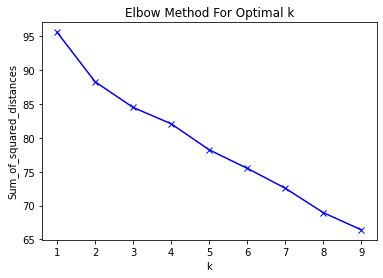

In [66]:

from sklearn.metrics import silhouette_score
#Find the optimal number of clusters
SS_dist = []

nftown_grouped_clustering = nftown_grouped.drop('Town/City', 1)

K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(nftown_grouped_clustering)
    SS_dist.append(kmeans.inertia_)
    
plt.plot(K, SS_dist, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

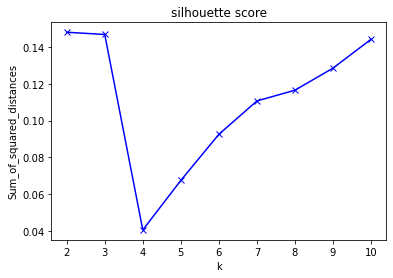

In [67]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k,random_state=0).fit(nftown_grouped_clustering)
  labels = kmeans.labels_
  sil.append(silhouette_score(nftown_grouped_clustering, labels))

x=[2,3,4,5,6,7,8,9,10]
plt.plot(x, sil, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('silhouette score')
plt.show()

In [68]:
# set number of clusters
kclusters = 2

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=1).fit(nftown_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [83]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

nftown_merged = nftown_data

nftown_merged = nftown_merged.join(neighborhoods_venues_sorted.set_index('Town/City'), on='Town/City')

nftown_merged

ValueError: cannot insert Cluster Labels, already exists

In [84]:
nftown_merged = nftown_merged[nftown_merged['Cluster Labels'].notna()]

nftown_merged

Town/City    Area Latitude Longitude  \
0                                    Corner Brook  148.26   48.951  -57.9501   
1                                     Mount Pearl   15.76  47.5189  -52.8063   
2                                      St. John's  445.88  47.5608  -52.7122   
4                                    Anchor Point    2.41  51.2334  -56.7981   
5                                        Appleton    6.39  48.9949   -54.862   
7                                   Arnold's Cove    4.79  47.7726  -53.9785   
9                                          Badger    1.96  48.9833  -56.0315   
10                                     Baie Verte  371.09  49.9398  -56.1914   
13                                      Bay Bulls   30.74   47.317  -52.8186   
14                                   Bay de Verde   13.28  48.0893  -52.8974   
16                                    Bay Roberts   24.05   47.584  -53.2815   
21                                     Birchy Bay   49.52  49.3543  -54.7131   
22                                      Bird Cove    9.39  51.0562   -56.921   
24                                 Bishop's Falls   28.12  49.0269  -55.4567   
25                                      Bonavista    31.5  48.6561  -53.0991   
26                                        Botwood   15.05  49.1309  -55.3669   
30                                         Brigus   11.57  47.5306  -53.2321   
32                                        Buchans    4.88  48.8257  -56.8548   
33                                         Burgeo   31.34  47.6167  -57.6152   
34                                          Burin   34.14  47.0504  -55.1631   
37                                    Campbellton   35.71  49.2832  -54.9314   
38                                    Cape Broyle   10.05   47.093  -52.9425   
39                                Cape St. George   33.46  48.4691  -59.2382   
40                                      Carbonear   11.81  47.7332  -53.2148   
41                                    Carmanville   43.08   49.402  -54.2876   
42                                     Cartwright    3.27  53.7195  -57.0174   
43                    Centreville-Wareham-Trinity   37.25  49.0058  -53.9012   
44                                    Chance Cove    18.2  47.6508  -53.8006   
45                                 Change Islands    5.31  49.6666  -54.4148   
46                       Channel-Port aux Basques   38.77  47.5735  -59.1424   
49                                    Clarenville  140.81  48.1481  -53.9693   
50                                 Clarke's Beach   12.71  47.5528  -53.2863   
52                                        Colinet    6.24  47.2193  -53.5522   
53                                       Colliers   26.23  47.4666  -53.2148   
54                                 Come By Chance   39.72  47.8027  -53.9985   
56                           Conception Bay South    59.1  47.5126  -52.9688   
57                             Conception Harbour   21.61  47.4402  -53.2116   
60                                        Cormack  133.88    49.31  -57.3837   
62                                       Cow Head   17.84  49.9346  -57.7453   
64                                      Crow Head    2.98  49.6748  -54.8039   
65                                         Cupids   11.02  47.5474  -53.2293   
67                                      Deer Lake   73.23  49.1753  -57.4237   
70                                       Eastport   18.64  48.6522  -53.7613   
71                                       Elliston   10.05  48.6334  -53.0422   
72                                         Embree   18.16   49.306  -55.0247   
75                                       Fermeuse   38.76   46.974  -52.9581   
76                                      Ferryland   13.62   47.022  -52.8899   
77                                       Flatrock   18.12  47.7117   -52.725   
78                                   Fleur de Lys   39.77  50.1167  -56.1314   
79                                  Flow

In [86]:
# create map
map_clusters = folium.Map(location=[nf_latitude, nf_longitude], zoom_start=7)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(nftown_merged['Latitude'], nftown_merged['Longitude'], nftown_merged['Town/City'], nftown_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [87]:
nftown_merged.loc[nftown_merged['Cluster Labels'] == 0, nftown_merged.columns[[0] + list(range(5, nftown_merged.shape[1]))]]

Town/City  Cluster Labels  \
21                                     Birchy Bay             0.0   
26                                        Botwood             0.0   
37                                    Campbellton             0.0   
52                                        Colinet             0.0   
53                                       Colliers             0.0   
57                             Conception Harbour             0.0   
87                                          Gambo             0.0   
99                                Grand le Pierre             0.0   
134                                  Lewin's Cove             0.0   
170                                  Northern Arm             0.0   
221  Small Point-Adam's Cove-Blackhead-Broad Cove             0.0   
248                                 Terrenceville             0.0   

    1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
21      Convenience Store           Wings Joint          Fishing Spot   
26                    ATM     Convenience Store          Fishing Spot   
37      Convenience Store           Wings Joint          Fishing Spot   
52      Convenience Store        Scenic Lookout           Wings Joint   
53      Convenience Store           Wings Joint          Fishing Spot   
57      Convenience Store           Wings Joint          Fishing Spot   
87          Grocery Store     Convenience Store           Wings Joint   
99      Convenience Store                   Bar           Wings Joint   
134     Convenience Store           Wings Joint          Fishing Spot   
170     Convenience Store           Wings Joint          Fishing Spot   
221     Convenience Store                 Motel           Wings Joint   
248     Convenience Store           Wings Joint          Fishing Spot   

          4th Most Common Venue       5th Most Common Venue  \
21   Construction & Landscaping              Cosmetics Shop   
26   Construction & Landscaping              Cosmetics Shop   
37   Construction & Landscaping              Cosmetics Shop   
52            Fish & Chips Shop  Construction & Landscaping   
53   Construction & Landscaping              Cosmetics Shop   
57   Construction & Landscaping              Cosmetics Shop   
87                 Fishing Spot  Construction & Landscaping   
99                Fishing Store              Cosmetics Shop   
134  Construction & Landscaping              Cosmetics Shop   
170  Construction & Landscaping              Cosmetics Shop   
221           Fish & Chips Shop  Construction & Landscaping   
248  Construction & Landscaping              Cosmetics Shop   

    6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
21           Dance Studio      Department Store                 Diner   
26           Dance Studio      Department Store                 Diner   
37           Dance Studio      Department Store                 Diner   
52         Cosmetics Shop          Dance Studio      Department Store   
53           Dance Studio      Department Store                 Diner   
57           Dance Studio      Department Store                 Diner   
87         Cosmetics Shop          Dance Studio      Department Store   
99           Dance Studio      Department Store                 Diner   
134          Dance Studio      Department Store                 Diner   
170          Dance Studio      Department Store                 Diner   
221        Cosmetics Shop          Dance Studio      Department Store   
248          Dance Studio      Department Store                 Diner   

    9th Most Common Venue 10th Most Common Venue  
21         Discount Store               Dive Bar  
26         Discount Store               Dive Bar  
37         Discount Store               Dive Bar  
52                  Diner         Discount Store  
53         Discount Store               Dive Bar  
57         Discount Store               Dive Bar  
87                  Diner         Discount Store  
99         Dis

In [88]:

nftown_merged.loc[nftown_merged['Cluster Labels'] == 1, nftown_merged.columns[[0] + list(range(5, nftown_merged.shape[1]))]]

Town/City  Cluster Labels  \
0                                   Corner Brook             1.0   
1                                    Mount Pearl             1.0   
2                                     St. John's             1.0   
4                                   Anchor Point             1.0   
5                                       Appleton             1.0   
7                                  Arnold's Cove             1.0   
9                                         Badger             1.0   
10                                    Baie Verte             1.0   
13                                     Bay Bulls             1.0   
14                                  Bay de Verde             1.0   
16                                   Bay Roberts             1.0   
22                                     Bird Cove             1.0   
24                                Bishop's Falls             1.0   
25                                     Bonavista             1.0   
30                                        Brigus             1.0   
32                                       Buchans             1.0   
33                                        Burgeo             1.0   
34                                         Burin             1.0   
38                                   Cape Broyle             1.0   
39                               Cape St. George             1.0   
40                                     Carbonear             1.0   
41                                   Carmanville             1.0   
42                                    Cartwright             1.0   
43                   Centreville-Wareham-Trinity             1.0   
44                                   Chance Cove             1.0   
45                                Change Islands             1.0   
46                      Channel-Port aux Basques             1.0   
49                                   Clarenville             1.0   
50                                Clarke's Beach             1.0   
54                                Come By Chance             1.0   
56                          Conception Bay South             1.0   
60                                       Cormack             1.0   
62                                      Cow Head             1.0   
64                                     Crow Head             1.0   
65                                        Cupids             1.0   
67                                     Deer Lake             1.0   
70                                      Eastport             1.0   
71                                      Elliston             1.0   
72                                        Embree             1.0   
75                                      Fermeuse             1.0   
76                                     Ferryland             1.0   
77                                      Flatrock             1.0   
78                                  Fleur de Lys             1.0   
79                                 Flower's Cove             1.0   
80                                   Fogo Island             1.0   
81                                       Forteau             1.0   
82                                       Fortune             1.0   
85                              Frenchman's Cove             1.0   
88                                        Gander             1.0   
90                        Gaskiers-Point La Haye             1.0   
93            Glenburnie-Birchy Head-Shoal Brook             1.0   
94                                      Glenwood             1.0   
95                                    Glovertown             1.0   
96                               Goose Cove East             1.0   
97                                    Grand Bank             1.0   
98                           Grand Falls-Windsor             1.0   
100                                   Greenspond             1.0   
102                               Hant's Harbour             1.0   
103                        